In [2]:
from FADS.input import get_dset
from FADS.FeatureSelector import pValue, LassoNet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dset = get_dset("/home/shussain/Simulated_data/18082021/10000/0.5/sim_1/sim_1/PS/output/")

In [3]:
p = pValue(dset)
ln = LassoNet(dset, (1200, 800, 200,))

In [3]:
sns.set_theme(
    context = 'paper',
    palette='Set1',
    style = 'whitegrid',
    font_scale = 4
)

In [5]:
cmap=sns.color_palette('Set1', as_cmap=True)
cmap

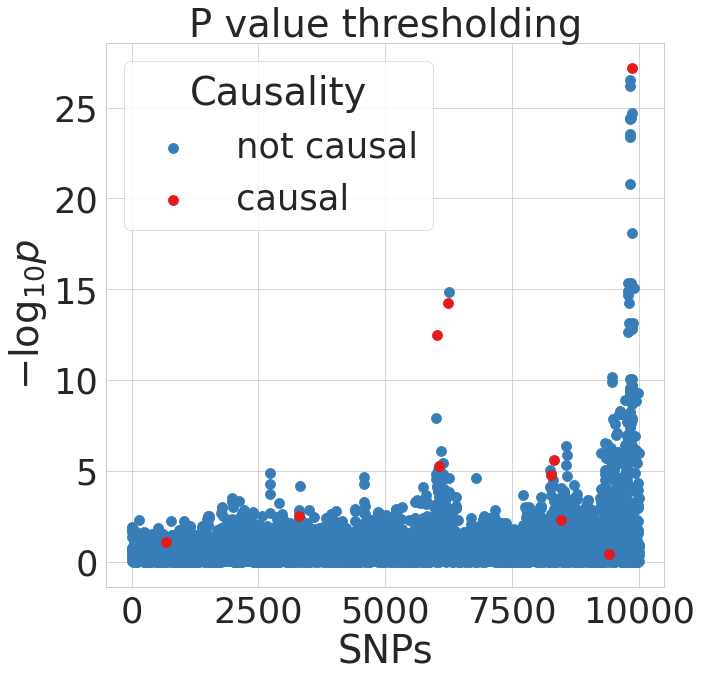

In [39]:
self = p
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title("P value thresholding")
groups = self.dset["ct"].groupby("causal")
for i, (is_causal, group) in zip((1, 0), groups):
    plt.scatter(group.index, self.importance[group.index], label="causal" if is_causal else "not causal", color=cmap(i), s=100)
plt.legend(title="Causality")
plt.xlabel("SNPs")
plt.ylabel("$-\log_{10} p$")
plt.savefig("p.jpeg")

Using GPU id: 0 | UUID: GPU-af44f744-db9e-7732-4364-d11c06f70ef8 | gpu_util:   0.0% | mem_util:   0.2% | mem_free:  1993.0MB |  mem_total:  1996.0MB


KeyError: 'Column not found: 1'

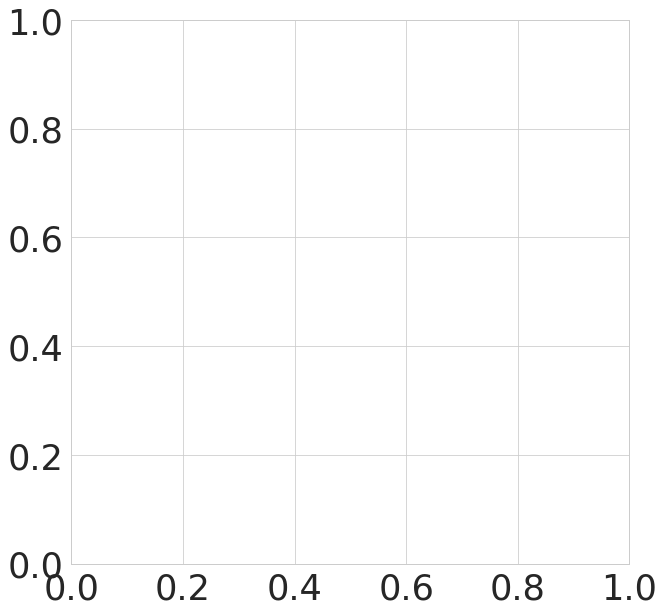

In [30]:
ln.manhattan()

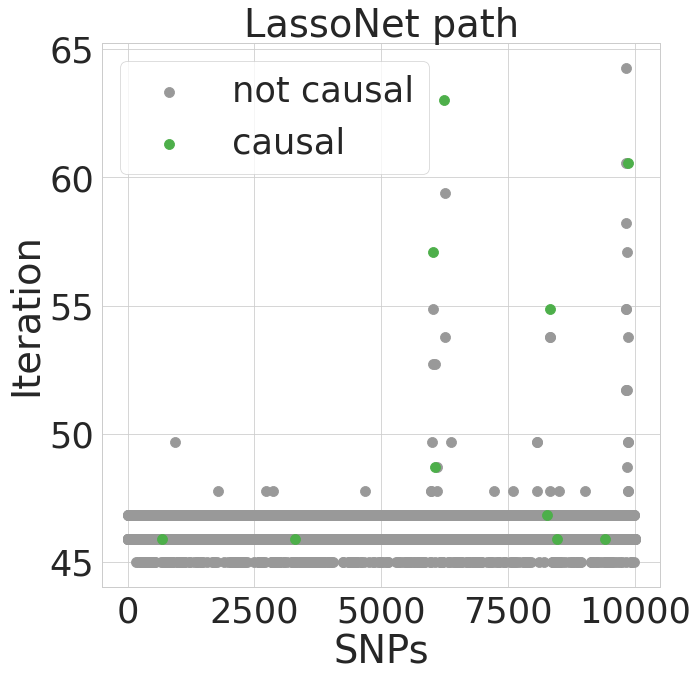

In [45]:
self = ln
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title("LassoNet path")
groups = self.dset["ct"].groupby("causal")
for i, (is_causal, group) in zip((8, 2), groups):
    plt.scatter(group.index, self.importance[group.index], label="causal" if is_causal else "not causal", color=cmap(i), s=100)
plt.legend()
plt.xlabel("SNPs")
plt.ylabel("Iteration")
plt.savefig("ln.jpeg")